In [39]:
import numpy as np
import pylab as mplot
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [40]:
size_ratio_grid = np.logspace(np.log10(0.5), np.log10(5), 21)
s2n_grid = np.logspace(np.log10(10), np.log10(300), 21)
size_ratio_grid2 = [str(xx)[:4] for xx in size_ratio_grid]
s2n_grid2 = [str(xx)[:4] for xx in s2n_grid]

In [41]:
counts = np.zeros((20,20))
sigma_e2 = np.zeros((20,20))
sigma_e2_m = np.zeros((20,20))
R11 = np.zeros((20,20))
R11s = np.zeros((20,20))
R22 = np.zeros((20,20))
R22s = np.zeros((20,20))

for i in range(20):
    for j in range(20):
        X = np.loadtxt('response_'+str(i)+'_'+str(j)+'.txt')
        
        counts[i][j] = X[0]
        R11[i][j] = X[1]
        R11s[i][j] = X[2]
        R22[i][j] = X[3]
        R22s[i][j] = X[4]
        sigma_e2[i][j] = X[5]
        sigma_e2_m[i][j] = X[6]        
        

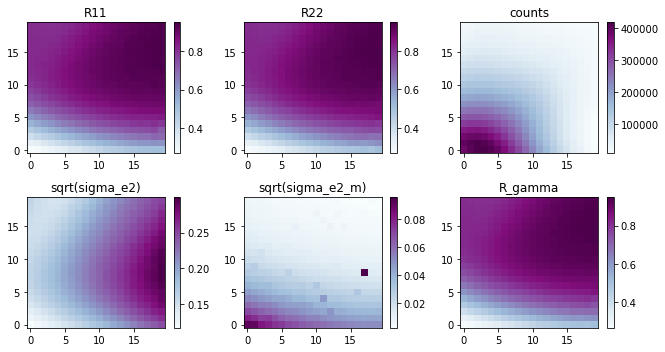

In [42]:
mplot.figure(figsize=(12,5))

mplot.subplot(241)
mplot.imshow(R11.T, cmap='BuPu', origin='lower', aspect='auto')
mplot.colorbar()
mplot.title('R11')

mplot.subplot(242)
mplot.imshow(R22.T, cmap='BuPu', origin='lower', aspect='auto')
mplot.colorbar()
mplot.title('R22')

mplot.subplot(243)
mplot.imshow(counts.T, cmap='BuPu', origin='lower', aspect='auto')
mplot.colorbar()
mplot.title('counts')

# mplot.subplot(244)
# mplot.imshow(R22s.T, cmap='BuPu', origin='lower', aspect='auto')
# mplot.colorbar()
# mplot.title('R22s')

mplot.subplot(245)
mplot.imshow(((sigma_e2*counts).T)**0.5, cmap='BuPu', origin='lower', aspect='auto')
mplot.colorbar()
mplot.title('sqrt(sigma_e2)')

mplot.subplot(246)
mplot.imshow((sigma_e2_m.T)**0.5, cmap='BuPu', origin='lower', aspect='auto')
mplot.colorbar()
mplot.title('sqrt(sigma_e2_m)')

mplot.subplot(247)
mplot.imshow(((R11+R22)/2).T, cmap='BuPu', origin='lower', aspect='auto')
mplot.colorbar()
mplot.title('R_gamma')

# mplot.subplot(248)
# mplot.imshow((1./(sigma_e2)).T, cmap='BuPu', origin='lower', aspect='auto')
# mplot.colorbar()
# mplot.title('1/sigma_e2_all')

mplot.tight_layout()

Text(0.5, 1.0, 'weight')

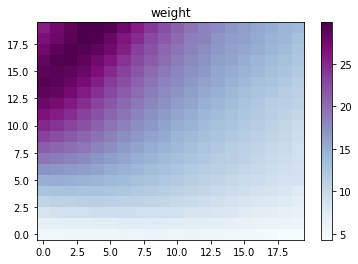

In [43]:
R_gamma = (R11+R22)/2
sigma_e_all = (sigma_e2*counts).copy()

mplot.imshow((1./(sigma_e_all*R_gamma**(-2))).T, cmap='BuPu', origin='lower', aspect='auto')
mplot.colorbar()
mplot.title('weight')
# mplot.clim(0,100)